# Project: Working on TMDb Movie Data 
Table Contents:

*   Introduction
*   Data Wrangling
*   EDA(Exploaratory Data Analysis)
*   Conclusions



# Introduction
This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb).
The questions are:

*   What kind of genres lead to more profitable business?
*   Which genres are most popular from year to year?
*   Does Vote average affects the profit of the movie?
*   More the revenue spend leads to profit or loss?

In [0]:
# ALL the important packages are been imported like numpy,pandas, matplotlib
# the magic statement inline is added for the visualization on the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#We are the loading the dataset
#And by using head we are checking the top 5 rows
df=pd.read_csv('tmdb_movies_data.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [0]:
# This gives us the brief idea about the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Data Cleaning

In [0]:
# After using the describe function we found out the following columns are not useful
# So, we are dropping the following columns
df.drop(columns=['id','imdb_id','budget','revenue','runtime','original_title','cast','homepage','director','tagline','keywords','overview','runtime','production_companies','release_date'],inplace=True)

In [0]:
# By this we can know the datatypes of the columns and also the columns which are null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
popularity      10866 non-null float64
genres          10843 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 594.4+ KB


In [0]:
#We are dropping all the rows which are having null in it
df.dropna(inplace=True)

In [0]:
# Now, we can check again that the specific performed task is done or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 7 columns):
popularity      10843 non-null float64
genres          10843 non-null object
vote_count      10843 non-null int64
vote_average    10843 non-null float64
release_year    10843 non-null int64
budget_adj      10843 non-null float64
revenue_adj     10843 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 677.7+ KB


In [0]:
# We are splitting the genres as we can see that a movie has many genres
# we have found that a movie has maximum of 5 genres 
new = df['genres'].str.split("|", n = 4, expand = True)
df['split1']=new[0]
df['split2']=new[1]
df['split3']=new[2]
df['split4']=new[3]
df['split5']=new[4]

In [0]:
#after splitting genres in 5 parts
# we are dropping genres column 
df.drop(columns =["genres"], inplace = True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 11 columns):
popularity      10843 non-null float64
vote_count      10843 non-null int64
vote_average    10843 non-null float64
release_year    10843 non-null int64
budget_adj      10843 non-null float64
revenue_adj     10843 non-null float64
split1          10843 non-null object
split2          8515 non-null object
split3          5079 non-null object
split4          1981 non-null object
split5          542 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 1016.5+ KB


In [0]:
# Now we are making 5 dataframes that contains 5 different genres 
df1=df.iloc[:,:7]
df1=df1.rename(columns={"split1": "genres"})
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 7 columns):
popularity      10843 non-null float64
vote_count      10843 non-null int64
vote_average    10843 non-null float64
release_year    10843 non-null int64
budget_adj      10843 non-null float64
revenue_adj     10843 non-null float64
genres          10843 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 677.7+ KB


,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,5562,6.5,2015,137999939.3,1.392446e+09,Action
1,28.419936,6185,7.1,2015,137999939.3,3.481613e+08,Action
2,13.112507,2480,6.3,2015,101199955.5,2.716190e+08,Adventure
3,11.173104,5292,7.5,2015,183999919.0,1.902723e+09,Action
4,9.335014,2947,7.3,2015,174799923.1,1.385749e+09,Action


In [0]:
# Now taking the split 2 and making dataframe and renaming the column to genre
# and dropping others which are having null values
df2=df.iloc[:,np.r_[0:5,7]]
df2=df2.rename(columns={"split2": "genres"})
df2=df2.dropna()
df2.head(1)

,popularity,vote_count,vote_average,release_year,budget_adj,genres
0,32.985763,5562,6.5,2015,137999939.3,Adventure


In [0]:
#Now taking the split 3 and making dataframe and renaming the column to genre
# and dropping others which are having null values
df3=df.iloc[:,np.r_[0:5,8]]
df3=df3.rename(columns={"split3": "genres"})
df3=df3.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5079 entries, 0 to 10862
Data columns (total 6 columns):
popularity      5079 non-null float64
vote_count      5079 non-null int64
vote_average    5079 non-null float64
release_year    5079 non-null int64
budget_adj      5079 non-null float64
genres          5079 non-null object
dtypes: float64(3), int64(2), object(1)
memory usage: 277.8+ KB


In [0]:
#Now taking split 4 and making the dataframe and renaming the column to genre
# and dropping others which are having null values
df4=df.iloc[:,np.r_[0:5,9]]
df4=df4.rename(columns={"split4": "genres"})
df4=df4.dropna()
df4.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 10859
Data columns (total 6 columns):
popularity      1981 non-null float64
vote_count      1981 non-null int64
vote_average    1981 non-null float64
release_year    1981 non-null int64
budget_adj      1981 non-null float64
genres          1981 non-null object
dtypes: float64(3), int64(2), object(1)
memory usage: 108.3+ KB


In [0]:
#Now taking split 5 and making the dataframe and renaming the column to genre
# and dropping others which are having null values
df5=df.iloc[:,np.r_[0:5,10]]
df5=df5.rename(columns={"split5": "genres"})
df5=df5.dropna()
df5.head()
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 20 to 10851
Data columns (total 6 columns):
popularity      542 non-null float64
vote_count      542 non-null int64
vote_average    542 non-null float64
release_year    542 non-null int64
budget_adj      542 non-null float64
genres          542 non-null object
dtypes: float64(3), int64(2), object(1)
memory usage: 29.6+ KB


In [0]:
#Appending all the dataframe 
edited_df = df1.append([df2, df3, df4 , df5],ignore_index=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [0]:
edited_df[edited_df['genres'].str.contains("|")]

,budget_adj,genres,popularity,release_year,revenue_adj,vote_average,vote_count
0,1.379999e+08,Action,32.985763,2015,1.392446e+09,6.5,5562
1,1.379999e+08,Action,28.419936,2015,3.481613e+08,7.1,6185
2,1.012000e+08,Adventure,13.112507,2015,2.716190e+08,6.3,2480
3,1.839999e+08,Action,11.173104,2015,1.902723e+09,7.5,5292
4,1.747999e+08,Action,9.335014,2015,1.385749e+09,7.3,2947
...,...,...,...,...,...,...,...
26955,9.256081e+06,Crime,0.410366,1966,NaN,5.9,99
26956,8.061618e+07,Romance,0.299911,1966,NaN,7.0,28
26957,0.000000e+00,Action,0.252399,1966,NaN,5.8,12
26958,0.000000e+00,Mystery,0.202473,1966,NaN,6.0,14


# Exploaratory Data Analysis

In [0]:
edited_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26960 entries, 0 to 26959
Data columns (total 7 columns):
budget_adj      26960 non-null float64
genres          26960 non-null object
popularity      26960 non-null float64
release_year    26960 non-null int64
revenue_adj     10843 non-null float64
vote_average    26960 non-null float64
vote_count      26960 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.4+ MB


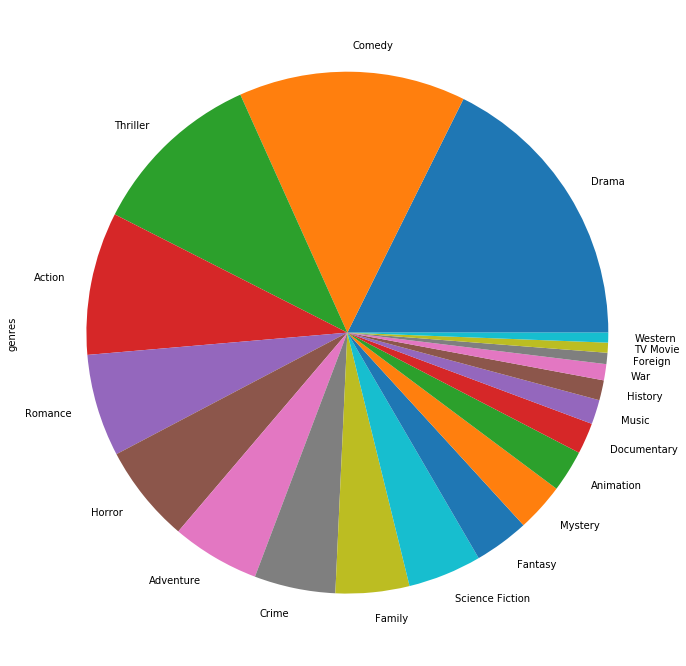

In [0]:
# forming a pie for showing the total number of genre produce
edited_df['genres'].value_counts().plot(kind='pie',figsize=(12,12))

In [0]:
# We are making new column name profit 
edited_df['profit']=edited_df['revenue_adj']-edited_df['budget_adj']


# Question 2: Which genres are most popular from year to year?

In [0]:
edited_df.groupby('release_year')['genres','vote_average'].mean()

,vote_average
release_year,
1960,6.346154
1961,6.326667
1962,6.263415
1963,6.337363
1964,6.247748
1965,6.196809
1966,6.173950
1967,6.279592
1968,6.433696


In [0]:
edited_df.describe()

,budget_adj,popularity,release_year,revenue_adj,vote_average,vote_count,profit
count,2.696000e+04,26960.000000,26960.000000,1.084300e+04,26960.000000,26960.000000,1.084300e+04
mean,2.104112e+07,0.706091,2000.700148,5.147332e+07,5.956358,249.973813,3.388505e+07
std,3.819696e+07,1.114877,12.763823,1.447664e+08,0.911935,637.964080,1.253381e+08
min,0.000000e+00,0.000065,1960.000000,0.000000e+00,1.500000,10.000000,-4.139124e+08
25%,0.000000e+00,0.224628,1994.000000,0.000000e+00,5.400000,18.000000,0.000000e+00
50%,2.248029e+02,0.411416,2005.000000,0.000000e+00,6.000000,44.000000,0.000000e+00
75%,2.704173e+07,0.774737,2011.000000,3.387655e+07,6.600000,173.000000,1.307715e+07
max,4.250000e+08,32.985763,2015.000000,2.827124e+09,9.200000,9767.000000,2.750137e+09


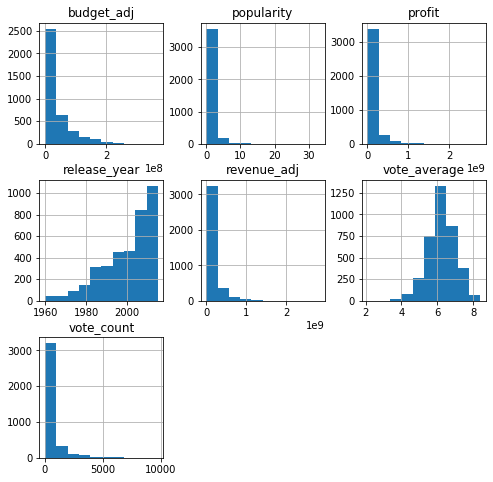

In [0]:
edited_df[edited_df['profit']>0].hist(figsize=(8,8));

# Question 3: Does Vote average affects the profit of the movie?
# Answer 3: Yes vote average affects the profit of the movie but not much.  Some part is upside.
# Question 4:More the budget spend on movie leads to profit or loss?
# Answer 4: yes but not much.

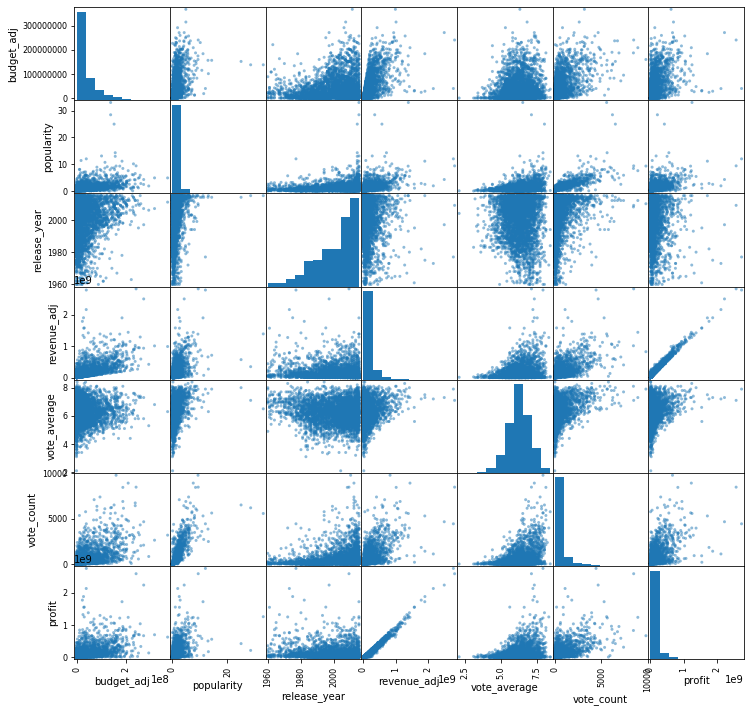

In [0]:
# we are plotting the scatter matrix of all the columns
pd.plotting.scatter_matrix(edited_df[edited_df['profit']>0],figsize=(12,12));

# Question 1: What kind of genres lead to more profitable business?
# Answer 1: According to the Data Genres like Adventure, Science fiction, family, fanatsy, animation provides good business on average basis.

In [0]:
edited_df.groupby('genres')['profit','vote_average'].mean()

,profit,vote_average
genres,,
Action,4.453567e+07,5.787421
Adventure,1.182376e+08,5.940585
Animation,5.375505e+07,6.403147
Comedy,2.591305e+07,5.905167
Crime,3.031328e+07,6.124059
Documentary,1.674048e+06,6.908462
Drama,2.277112e+07,6.165301
Family,5.664432e+07,5.997563
Fantasy,5.554370e+07,5.863537
